In [1]:
import cairo
from IPython.display import Image, display
from math import pi
from io import BytesIO

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
    ctx = cairo.Context(surface)
    draw_func(ctx, 200, 200)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=200))

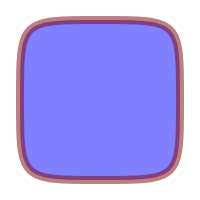

In [4]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    # a custom shape, that could be wrapped in a function
    x0 = 0.1  # parameters like cairo_rectangle
    y0 = 0.1
    rect_width = 0.8
    rect_height = 0.8
    radius = 0.4  # and an approximate curvature radius

    x1 = x0 + rect_width
    y1 = y0 + rect_height

    if rect_width / 2 < radius:
        if rect_height / 2 < radius:
            cr.move_to(x0, (y0 + y1) / 2)
            cr.curve_to(x0, y0, x0, y0, (x0 + x1) / 2, y0)
            cr.curve_to(x1, y0, x1, y0, x1, (y0 + y1) / 2)
            cr.curve_to(x1, y1, x1, y1, (x1 + x0) / 2, y1)
            cr.curve_to(x0, y1, x0, y1, x0, (y0 + y1) / 2)
        else:
            cr.move_to(x0, y0 + radius)
            cr.curve_to(x0, y0, x0, y0, (x0 + x1) / 2, y0)
            cr.curve_to(x1, y0, x1, y0, x1, y0 + radius)
            cr.line_to(x1, y1 - radius)
            cr.curve_to(x1, y1, x1, y1, (x1 + x0) / 2, y1)
            cr.curve_to(x0, y1, x0, y1, x0, y1 - radius)
    else:
        if rect_height / 2 < radius:
            cr.move_to(x0, (y0 + y1) / 2)
            cr.curve_to(x0, y0, x0, y0, x0 + radius, y0)
            cr.line_to(x1 - radius, y0)
            cr.curve_to(x1, y0, x1, y0, x1, (y0 + y1) / 2)
            cr.curve_to(x1, y1, x1, y1, x1 - radius, y1)
            cr.line_to(x0 + radius, y1)
            cr.curve_to(x0, y1, x0, y1, x0, (y0 + y1) / 2)
        else:
            cr.move_to(x0, y0 + radius)
            cr.curve_to(x0, y0, x0, y0, x0 + radius, y0)
            cr.line_to(x1 - radius, y0)
            cr.curve_to(x1, y0, x1, y0, x1, y0 + radius)
            cr.line_to(x1, y1 - radius)
            cr.curve_to(x1, y1, x1, y1, x1 - radius, y1)
            cr.line_to(x0 + radius, y1)
            cr.curve_to(x0, y1, x0, y1, x0, y1 - radius)

    cr.close_path()

    cr.set_source_rgb(0.5, 0.5, 1)
    cr.fill_preserve()
    cr.set_source_rgba(0.5, 0, 0, 0.5)
    cr.stroke()